In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.misc import derivative
from sympy import diff, symbols, cos, sin, tan


import scipy.stats as sts
import math

from scipy.optimize import minimize
from scipy.optimize import differential_evolution
%matplotlib inline

from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [14]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [30]:
dist_out = 1-pairwise_distances(raitings, metric="cosine")
similarity_dict = {}
iterable = 0
dist_out
for element in dist_out:
    maxval = 0
    maxind = 0
    for i in range(10):
        if (element[i] != 1.0) and element[i] > maxval:
            maxval = element[i]
            maxind = i
    similarity_dict[iterable] = maxind
    iterable+=1
similarity_dict 

{0: 8, 1: 4, 2: 9, 3: 9, 4: 8, 5: 9, 6: 3, 7: 5, 8: 0, 9: 2}

<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

Сдедлать низкоранговое приближение к текущей матрице с помощью синргулярного разложения

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [13]:
x = symbols('x')
diff1 = diff(tan(sin(x) + cos(2*x+3))**2)
print(diff1)

def f1(x):
    return math.tan(math.sin(x) + math.cos(2*x +3))**2

diff1 = derivative(f1, 1.0)

diff1

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))


57.06531269460301

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [31]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [32]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [33]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

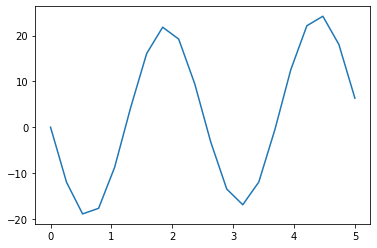

In [34]:
plt.plot(x, fx)
plt.show()


In [35]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [67]:
params = np.array([10, -10])
res = minimize(error, params, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 228.356721
         Iterations: 121
         Function evaluations: 232


array([  1.9528259 , -22.30985209])

Значение функции ошибки очень большое. Пробуем другие методы оптимизации: 

In [68]:
bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(error, bounds, seed=42)
result

     fun: 1.5130289208187264e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])

Уже намного лучше. Пробуем теперь метод Недлера-Мида с таким же параметрами (для проверки):

In [70]:
params = np.array([3, -2.5])
res = minimize(error, params, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000002
         Iterations: 51
         Function evaluations: 103


array([ 3. , -2.5])

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

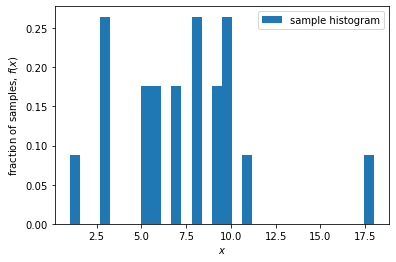

7.35

In [23]:
x = np.linspace(0,2,100)
rv = sts.skellam(10,3)
sample = rv.rvs(size=20)
pmf = rv.pmf(x)
plt.hist(sample, density=True, bins=30, label='sample histogram')
plt.legend()
plt.ylabel('fraction of samples, $f(x)$')
plt.xlabel('$x$')
plt.show()
sample.mean()

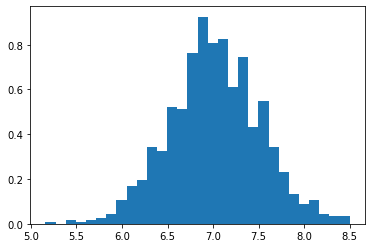

6.9

In [24]:
n = 50
samples_count = 1000
a = np.array([])
for number in range(samples_count):
    sample = rv.rvs(size=n)
    a = np.append(a, sample.mean())
plt.hist(a, density=True, bins=30, label='sample histogram')
plt.show()
sample.mean()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [25]:
m = np.array([[1, 4],
[1, 1]])
w,v = np.linalg.eig(m)

for i in range(len(w)):
    print("Собственное значение " + str(w[i]))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0000000000000004
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -0.9999999999999996
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
